In [91]:
import numpy as np
import sys
import os
import random
import matplotlib.pyplot as plt
import math
sys.path.append('../')
os.getcwd()


from src.GridWorld import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


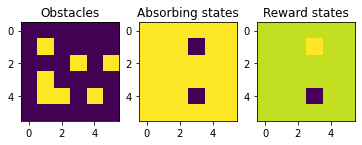

In [92]:
grid = GridWorld(p = 0.65)

In [70]:
def create_lists(self,trace,lists):
    
    for episode in trace:
        
        state_id,action,reward = episode
        
        if (state_id,action) not in lists:
            lists[(state_id,action)] = []
            
        for state_action_pair in lists:
            lists[state_action_pair].append(reward)
    
    return lists

lists = {}
trace =  [(5, 1, -1.0),(10, 3, -1.0),(9, 0, -1.0),(4, 1, -1.0),(3, 0, -1.0),(3, 0, 10.0)]
create_lists(self,trace,lists)

NameError: name 'self' is not defined

In [ ]:
def discount_rewards(self,lists,discount):
    
    for state_action in lists:
        dis_reward = 0 
        for time,reward in enumerate(lists[state_action]):
            dis_reward += (discount ** time) * reward
        lists[state_action] = dis_reward
    
    return lists

In [75]:
discount_rewards(self,lists,0.8)

{(5, 1): -0.08479999999999999,
 (10, 3): 1.1440000000000006,
 (9, 0): 2.6800000000000006,
 (4, 1): 4.600000000000001,
 (3, 0): 7.0}

In [76]:
lists

{(5, 1): -0.08479999999999999,
 (10, 3): 1.1440000000000006,
 (9, 0): 2.6800000000000006,
 (4, 1): 4.600000000000001,
 (3, 0): 7.0}

## Question 2

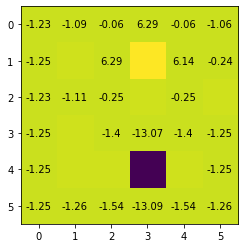

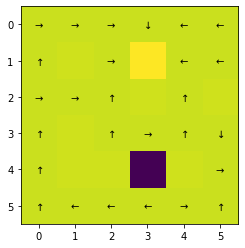

In [93]:
V2,opt_pol2,epochs2 = grid.value_iteration(discount = 0.2,threshold = 0.0001)
grid.draw_value(V2)
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol2[row,:]) for row in range(grid.state_size)]))


In [94]:
epochs2

7

In [4]:
V2

array([ -1.22774833,  -1.08743563,  -0.06185355,   6.29389949,
        -0.06492513,  -1.06363199,  -1.24651501,   6.28955423,
         0.        ,   6.13718254,  -0.23809547,  -1.23158731,
        -1.11274996,  -0.24680564,  -0.24630034,  -1.24748041,
        -1.40248985, -13.06953241,  -1.39886668,  -1.25367835,
        -1.24965891,   0.        ,  -1.25029347,  -1.2501275 ,
        -1.2571346 ,  -1.54080481, -13.09172918,  -1.5408073 ,
        -1.2571574 ])

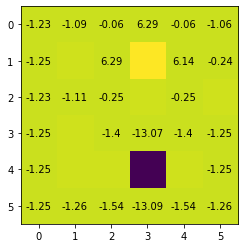

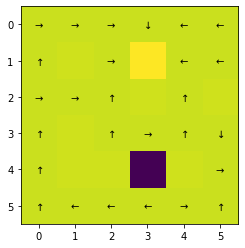

In [80]:
V2,opt_pol2,epochs2 = grid.policy_iteration(discount = 0.2,threshold = 0.00001)
grid.draw_value(V2)
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol2[row,:]) for row in range(grid.state_size)]))

## Question 3

In [202]:
Q3,opt_pol3,learning3,mse3,sauc3 = grid.mc_iterative(epsilon = 0.5,discount = 0.2,episodes = 1000)
V3 = np.sum(np.multiply(opt_pol3,Q3),axis = 1)
grid.draw_value(V3)
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol3[row,:]) for row in range(grid.state_size)]))


TypeError: choose_epolicy() missing 1 required positional argument: 'Q'

In [133]:
Q3

array([[-1.24938122e+00, -1.24760502e+00, -1.24936648e+00,
        -1.24987880e+00],
       [-1.23734420e+00, -1.21736028e+00, -1.24490173e+00,
        -1.24794973e+00],
       [-1.11946133e+00, -8.24856530e-01, -8.42281669e-01,
        -1.09420214e+00],
       [ 4.31153836e-01,  1.03509342e-01,  5.99418282e+00,
        -1.12401989e-01],
       [-1.17705885e+00, -1.13344454e+00, -8.40962584e-01,
        -7.89003800e-01],
       [-1.23323522e+00, -1.23594651e+00, -1.22499017e+00,
        -1.20434462e+00],
       [-1.24988552e+00, -1.25008891e+00, -1.24997027e+00,
        -1.24994690e+00],
       [ 3.25064031e-01,  6.50062446e+00,  1.60002708e-01,
         3.54792835e-01],
       [ 2.47976509e-01,  5.68224968e-01,  8.79907017e-01,
         6.51748636e-01],
       [ 8.25458076e-02,  6.20106422e-02, -4.13154551e-02,
         6.28297549e+00],
       [-1.17959429e+00, -1.19047945e+00, -1.15075850e+00,
        -9.83448479e-01],
       [-1.25014845e+00, -1.24913924e+00, -1.24975147e+00,
      

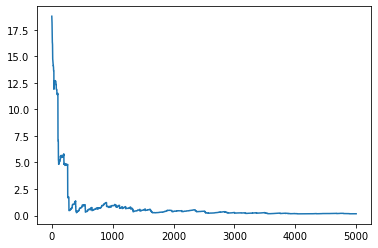

In [132]:
plt.plot(mse3)

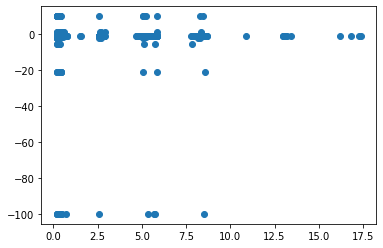

In [14]:
plt.scatter(mse3,learning3)

In [17]:
repeats = 1000
episodes = 500
acc3 = np.zeros((repeats,episodes))
for i in range(repeats):
    Q3,opt_pol3,learning3,mse3,sauc3 = grid.mc_iterative(discount = 0.2,alpha = 0.4,episodes = episodes)
    acc3[i,:] = np.array(learning3)
acc3

array([[  -1.25      ,   -1.24999995,   -1.25      , ...,   -1.25005056,
          -1.25      ,   -1.25      ],
       [  -1.25      ,   -1.25      ,   -1.25      , ...,   -1.25      ,
          -1.2500004 ,   -1.25      ],
       [  -1.2816    ,   -1.25000008,   -1.25      , ...,   -1.24928   ,
           1.        ,   -1.25      ],
       ...,
       [  -1.408     ,   -1.25      ,   -1.25      , ...,   -1.25      ,
          -1.2464    ,   -1.25      ],
       [  10.        ,    1.        ,   -1.25      , ...,   -1.2464    ,
          -1.25      ,   -1.25      ],
       [  -1.2500004 ,   -1.249856  ,   -0.8       , ...,   -1.25      ,
        -100.        ,   -1.251264  ]])

In [ ]:
plt.plot(np.mean(acc3,axis = 0))

In [ ]:
plt.plot(np.std(acc3,axis = 0))

## Question 4

In [199]:
Q4,opt_pol4,learning4,mse4,sauc4 = grid.SARSA_Control(discount = 0.2,alpha = 0.4,epsilon = 0.5,episodes = 1000)

[[416. 442. 414. 388.]
 [374. 358. 380. 342.]
 [245. 274. 272. 248.]
 [169. 148. 177. 160.]
 [163. 180. 178. 212.]
 [182. 187. 189. 212.]
 [460. 495. 456. 502.]
 [217. 208. 224. 187.]
 [  1.   1.   1.   1.]
 [156. 140. 158. 167.]
 [178. 215. 199. 228.]
 [470. 531. 520. 496.]
 [470. 461. 487. 429.]
 [340. 357. 355. 351.]
 [226. 203. 207. 208.]
 [573. 569. 549. 561.]
 [293. 284. 314. 326.]
 [199. 183. 195. 218.]
 [239. 251. 265. 254.]
 [329. 330. 340. 330.]
 [632. 578. 620. 549.]
 [  1.   1.   1.   1.]
 [363. 308. 403. 368.]
 [593. 558. 605. 573.]
 [481. 534. 474. 509.]
 [375. 402. 406. 407.]
 [247. 266. 276. 282.]
 [304. 318. 316. 327.]
 [377. 373. 366. 347.]]


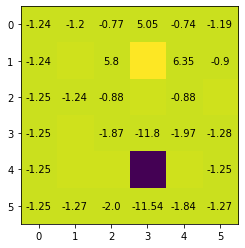

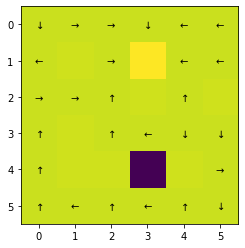

In [200]:
V4 = np.sum(np.multiply(opt_pol4,Q4),axis = 1)
grid.draw_value(V4)
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol4[row,:]) for row in range(grid.state_size)]))

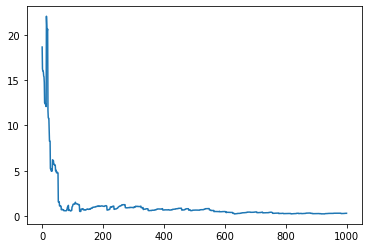

In [201]:
plt.plot(mse4)

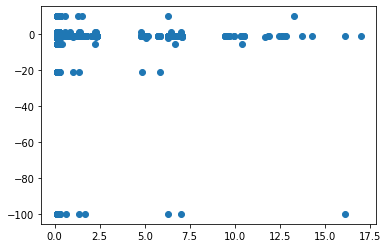

In [198]:
plt.scatter(mse4,learning4)

In [ ]:
repeats = 10000
episodes = 1000
acc4 = np.zeros((repeats,episodes))
for i in range(repeats):
    Q4,opt_pol4,learning4,mse4,sauc4 = grid.SARSA_Control(discount = 0.2,alpha = 0.4,epsilon = 0.5,episodes = episodes)
    acc4[i,:] = np.array(learning4)
acc4

In [ ]:
plt.plot(np.mean(acc4,axis = 0))

In [ ]:
plt.plot(np.std(acc4,axis = 0))

In [ ]:
#Checking p gamma relationship:

In [46]:
np.arange(0.0,1.05,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

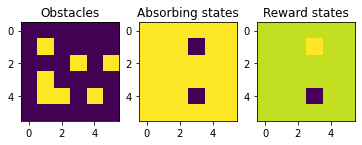

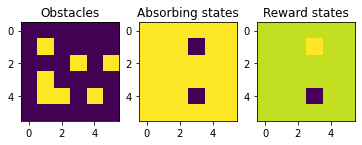

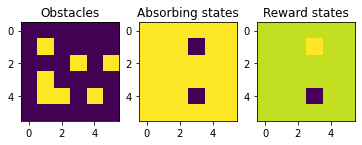

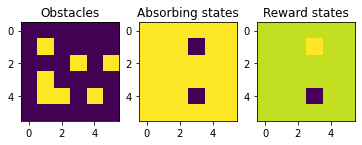

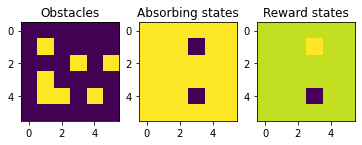

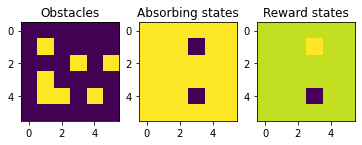

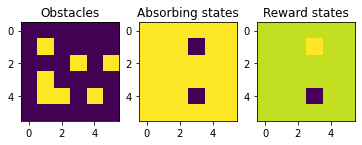

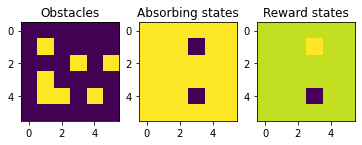

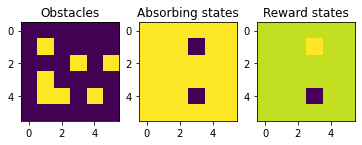

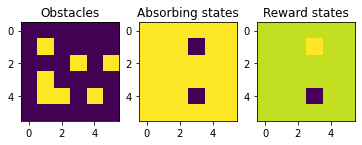

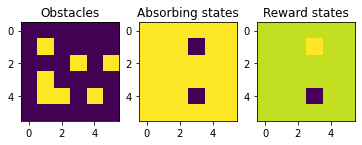

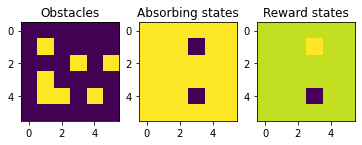

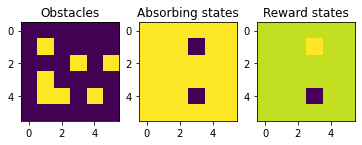

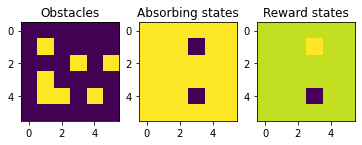

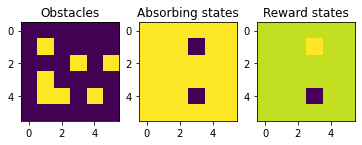

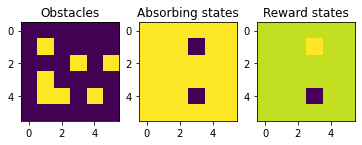

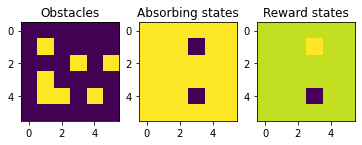

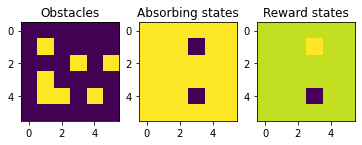

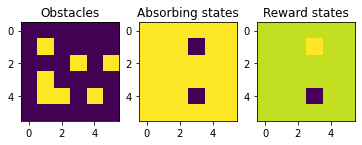

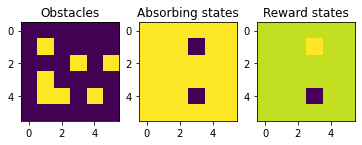

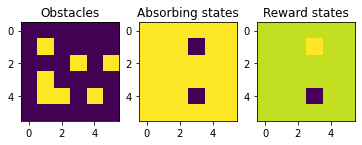

In [66]:
ps = np.arange(0.0,1.05,0.05)
gammas = np.arange(0.0,1.05,0.05)
results = np.zeros((ps.shape[0],gammas.shape[0]))

for i in range(len(ps)):
    grid = GridWorld(p = ps[i])
    for j in range(len(gammas)):
        Vtest,opt_poltest,epochstest = grid.value_iteration(discount = gammas[j],threshold = 0.000001)
        results[i,j] = np.array_equal(opt_pol2,opt_poltest)





In [68]:
results

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [61]:
ndd = np.zeros((ps.shape[0],gammas.shape[0]))
ndd[1,2] = True
ndd

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,